In [19]:
import sys
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

In [60]:
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [28]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']

df = pd.read_csv(url, names=names)

In [67]:
df.replace('?', -99999, inplace=True)

In [70]:
df['bare_nuclei'] = df['bare_nuclei'].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness           699 non-null int64
uniform_cell_size         699 non-null int64
uniform_cell_shape        699 non-null int64
marginal_adhesion         699 non-null int64
single_epithelial_size    699 non-null int64
bare_nuclei               699 non-null int32
bland_chromatin           699 non-null int64
normal_nucleoli           699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [35]:
# Benign: Has no cancer
# Malignan: Han cancer
df.head(10)
# 2 : Benign
# 4 : Malignan

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [36]:
df.columns

Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [37]:
df.axes

[RangeIndex(start=0, stop=699, step=1),
 Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
       dtype='object')]

In [39]:
df.drop(['id'], 1, inplace=True)
df.head()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


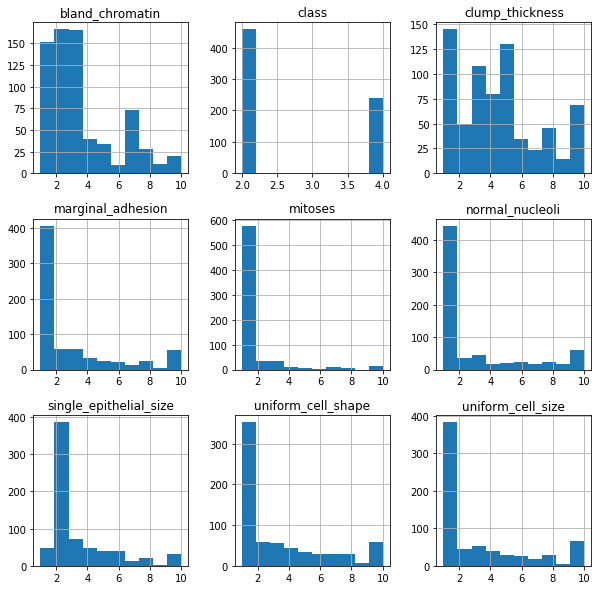

In [41]:
df.hist(figsize = (10,10))
plt.show()

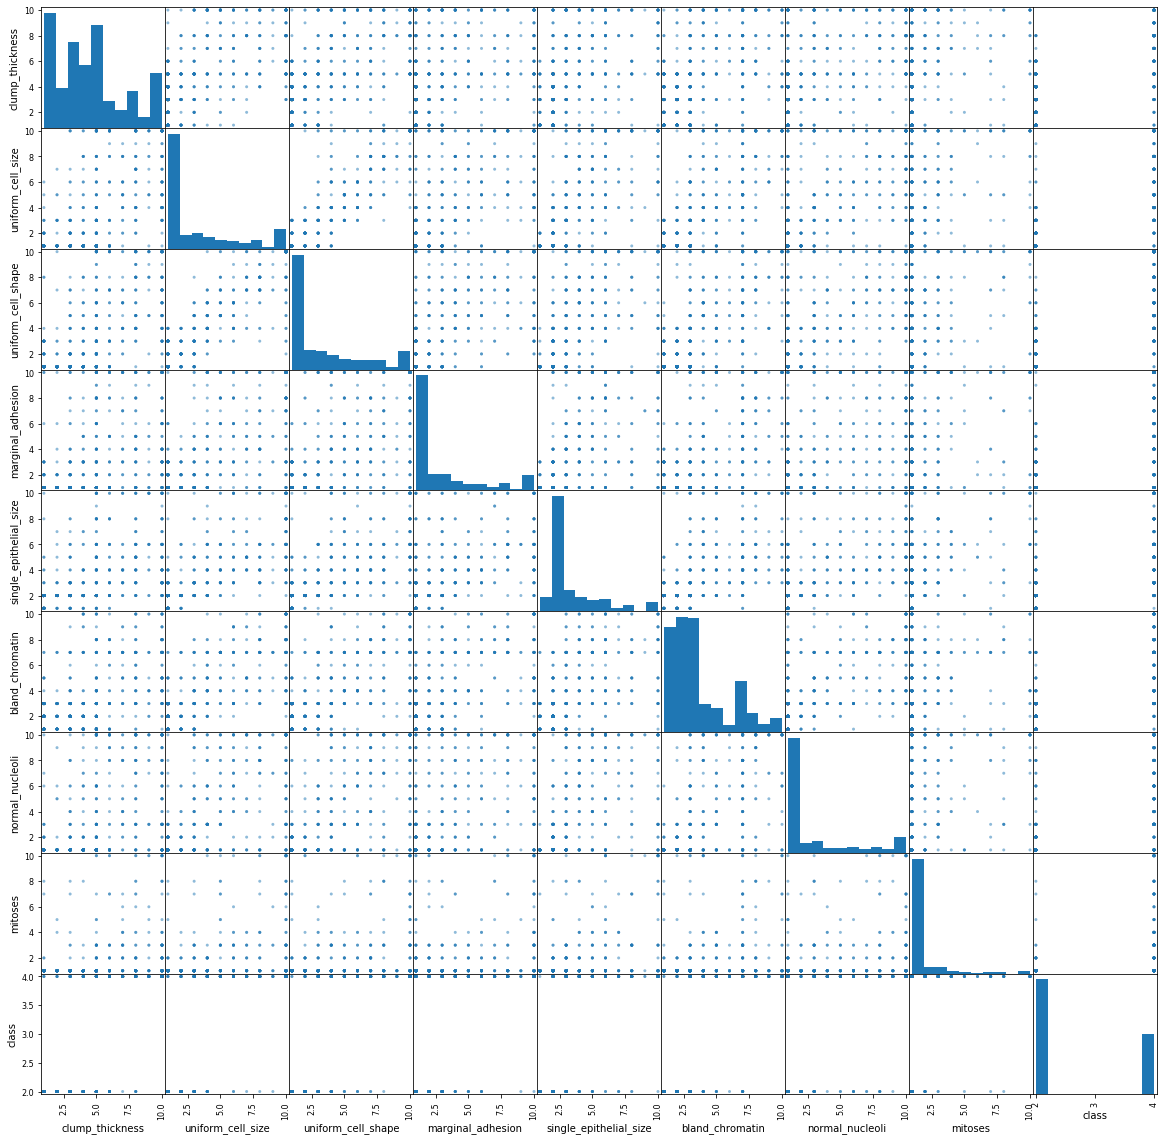

In [44]:
scatter_matrix(df, figsize=(20, 20))
plt.show()

In [81]:
X = np.array(df.drop(['class'], 1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [98]:
X_train[0]

array([5, 2, 1, 1, 2, 1, 3, 1, 1], dtype=int64)

In [83]:
scoring = 'accuracy'
seed = 42

In [84]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM', SVC()))

results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name} : {cv_results.mean()} {cv_results.std()}")

KNN : 0.9642207792207792 0.02525456495576075
SVM : 0.9570779220779221 0.02140780181962929


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

In [85]:
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM
0.95
              precision    recall  f1-score   support

           2       1.00      0.93      0.96        95
           4       0.87      1.00      0.93        45

    accuracy                           0.95       140
   macro avg       0.93      0.96      0.94       140
weighted avg       0.96      0.95      0.95       140



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [86]:
clf = SVC()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.95


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [111]:
example = np.array([5, 2, 1, 1, 2, 1, 3, 1, 10])
# example

In [112]:
example = example.reshape(1, -1)
# example

In [113]:
pred = clf.predict(example)
print(pred)

[4]
